In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


from neupy.algorithms import PNN, GRNN
from neupy import estimators

%matplotlib inline

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


##  Задание 1

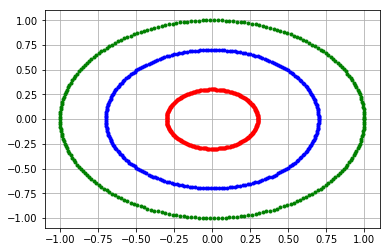

In [8]:
a1 = 0.3
b1 = 0.3
a2 = 0.7
b2 = 0.7
a3 = 1
b3 = 1

step = 0.025
t = np.linspace(0, 2*np.pi, int(2*np.pi/step), endpoint=True)

def f(a, t):
    return a*np.cos(t)

def g(b, t):
    return b*np.sin(t)

x1 = f(a1, t)
y1 = g(b1, t)
x2= f(a2, t)
y2= g(b2, t)
x3= f(a3, t)
y3= g(b3, t)

plt.plot(x1, y1, '.r')
plt.plot(x2, y2, '.b')
plt.plot(x3, y3, '.g')
plt.grid(True)
plt.show()

In [9]:
df1 = pd.DataFrame({'x' : x1, 'y' : y1, 'target' : 0})
df2 = pd.DataFrame({'x' : x2, 'y' : y2, 'target' : 1})
df3 = pd.DataFrame({'x' : x3, 'y' : y3, 'target' : 2})

def split_df(df):
    x_train, x_test = train_test_split(df, test_size=0.3, shuffle=True, random_state=21)
    x_valid, x_test = train_test_split(x_test, test_size=0.3, shuffle=True, random_state=14)
    return x_train, x_valid, x_test

train = []
valid = []
test = []

for df in (df1, df2 ,df3):
    tr, v, te = split_df(df)
    train.append(tr)
    valid.append(v)
    test.append(te)
train = pd.concat(train)
valid = pd.concat(valid)
test = pd.concat(test)

In [66]:
def build_model(model, train, test, valid):
    model.fit(train.iloc[:, :-1], train.target)
    p = []

    p.append(model.predict(train.iloc[:, :-1]))
    print('Train score:', accuracy_score(train['target'], p[-1]))

    p.append(model.predict(test.iloc[:, :-1]))
    print('Test score', accuracy_score(test['target'], p[-1]))

    p.append(model.predict(valid.iloc[:, :-1]))
    print('Valid score', accuracy_score(valid['target'], p[-1]))

    titles = ['train', 'test', 'valid']

    for idx, df in enumerate((train, test, valid)):
        plt.scatter(df.x, df.y, c=p[idx])
        plt.grid(True)
        plt.title(titles[idx])
        plt.show()

    h = 0.025
    grid_pred = np.array([pnn.predict(np.array([[i, j]])).round() for i in np.arange(-1.2, 1.2+h, h)
                                                           for j in np.arange(-1.2, 1.2+h, h)])

    x_vals = np.arange(-1.2, 1.2+h, h)
    y_vals = np.arange(-1.2, 1.2+h, h)

    xx, yy = np.meshgrid(x_vals, y_vals)

    lb = LabelBinarizer()
    data = lb.fit_transform(grid_pred.flatten())

    plt.scatter(xx, yy, c=data)
    plt.show()

### Param = 0.3

Train score: 1.0
Test score 1.0
Valid score 1.0


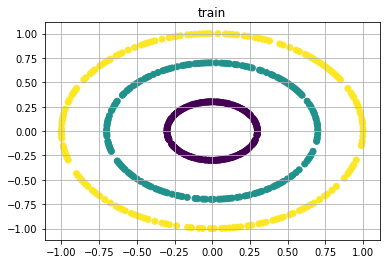

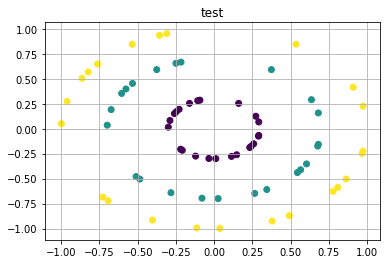

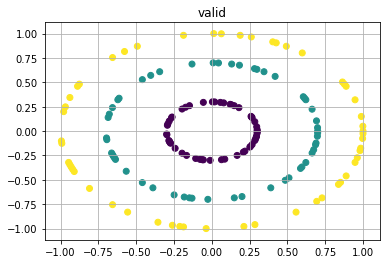

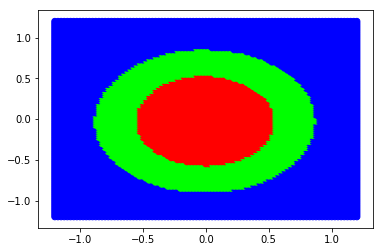

In [67]:
build_model(PNN(std=0.3), train, test, valid)

### Param = 0.1

Train score: 1.0
Test score 1.0
Valid score 1.0


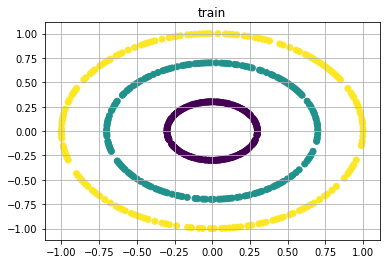

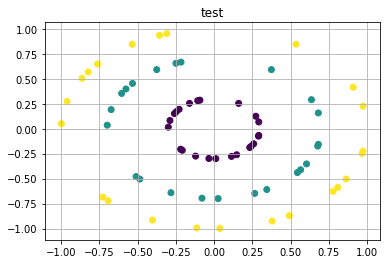

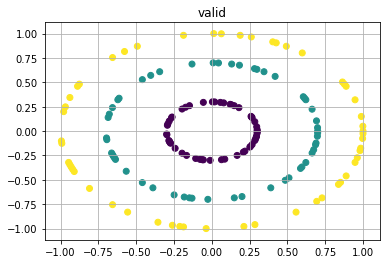

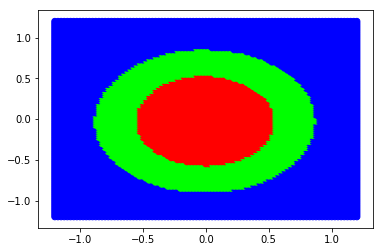

In [68]:
build_model(PNN(std=0.1), train, test, valid)

## Задание 2

### Param = 0.3

Train score: 1.0
Test score 1.0
Valid score 1.0


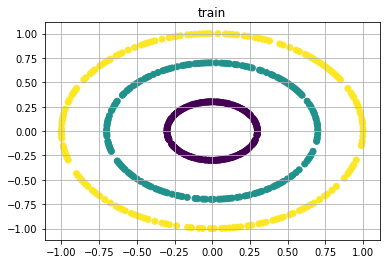

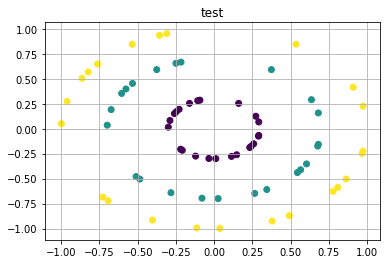

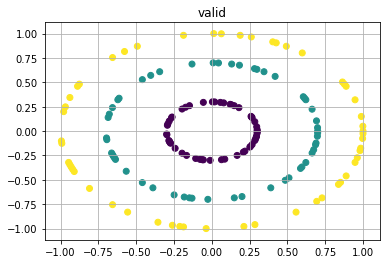

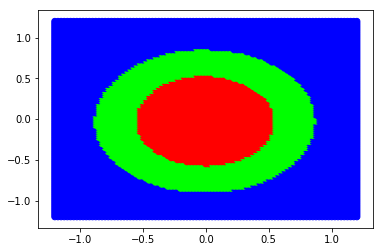

In [69]:
build_model(SVC(gamma=0.3), train, test, valid)

### Param = 0.1

Train score: 0.9542857142857143
Test score 0.927536231884058
Valid score 0.9559748427672956


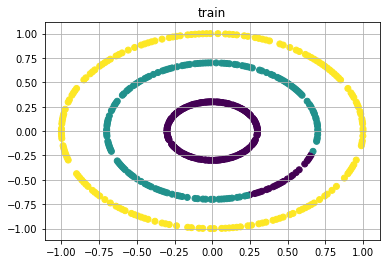

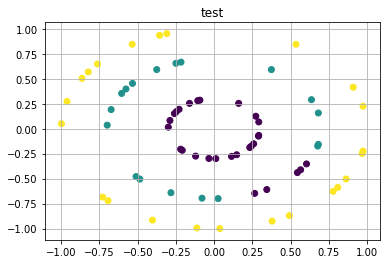

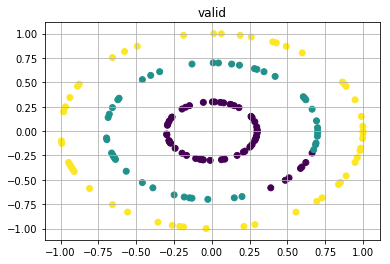

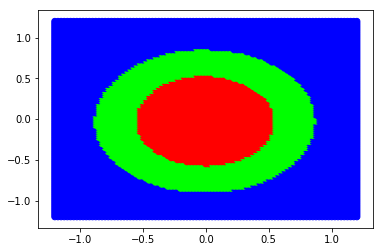

In [70]:
build_model(SVC(gamma=0.1), train, test, valid)

## Задание 3

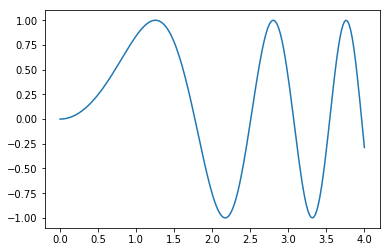

In [71]:
h = 0.02
t = np.linspace(0, 4, int(4/0.02), endpoint=True)
x = np.sin(t**2)

plt.plot(t, x);

In [133]:
def build_model2(std, train_size, t, x):
    train_size = int(t.shape[0] * train_size)

    # X_train = t[:train_size]
    # y_train = x[:train_size]
    # X_test = t[train_size:]
    # y_test = x[train_size:]
    
    X_train, X_test, y_train, y_test = train_test_split(t, x, train_size=train_size, shuffle=True, random_state=14)

    scaler_x = StandardScaler()
    scaler_y = StandardScaler()
    tmp_train_scaled_x = scaler_x.fit_transform(X_train[:, np.newaxis])
    tmp_test_scaled_x = scaler_x.transform(X_test[:, np.newaxis])
    tmp_train_scaled_y = scaler_y.fit_transform(y_train[:, np.newaxis])

    grnn = GRNN(std=std)
    grnn.fit(tmp_train_scaled_x, tmp_train_scaled_y)

    pred_x = grnn.predict(tmp_train_scaled_x)
    pred_x = scaler_y.inverse_transform(pred_x)
    mse = mean_squared_error(y_train, pred_x.flatten())
    print(f'RMSE = {np.sqrt(mse)}')

    plt.scatter(X_train, y_train, label='train')
    plt.scatter(X_train, pred_x, label='predict')
    plt.legend()
    plt.show()

    pred_x = grnn.predict(tmp_test_scaled_x)
    pred_x = scaler_y.inverse_transform(pred_x)
    mse = mean_squared_error(y_test, pred_x.flatten())
    print(f'RMSE = {np.sqrt(mse)}')

    plt.scatter(X_test, y_test, label='test')
    plt.scatter(X_test, pred_x, label='predict')
    plt.legend()
    plt.show()

### 10% на тест

/Users/LeGatto53/anaconda3/envs/nn/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


RMSE = 0.027001301487764945


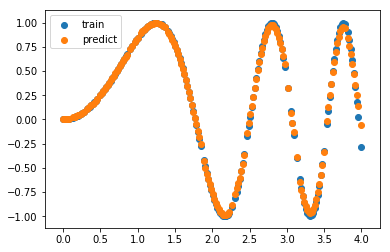

RMSE = 0.04231618259111297


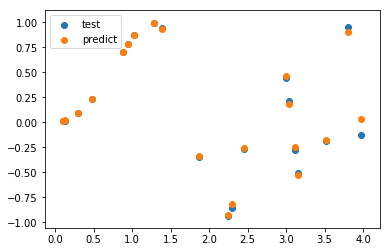

In [134]:
build_model2(0.05, 0.9, t, x)

### 20% на тест

/Users/LeGatto53/anaconda3/envs/nn/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


RMSE = 0.02946052905202593


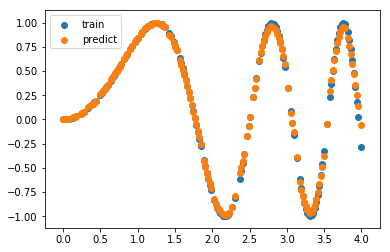

RMSE = 0.03400232978211697


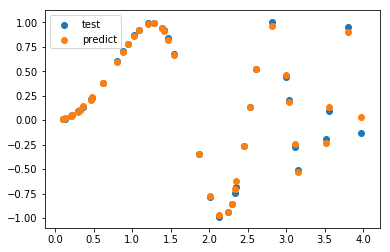

In [135]:
build_model2(0.05, 0.8, t, x)